# Visualize Likert scale responses

## Load data

In [1]:
# Load Tekko survey data
import pandas as pd

path = '../data/tekko_responses.csv'
responses = pd.read_csv(path)
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 46 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                        --------------  -----  
 0   Response ID                                                                                                                                                                                                                   175 non-null    object 
 1   concrete experience                                                                                                                      

In [2]:
# Select and format data
discrimination_cols = [col for col in responses.columns if 'How often do you see the following appear in multiplayer matches?' in col]
discrimination_responses = responses[discrimination_cols].copy().dropna()
discrimination_responses.info()
discrimination_responses.head()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 23 to 174
Data columns (total 6 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   How often do you see the following appear in multiplayer matches? - Ableism (anti-disability) rhetoric       152 non-null    object
 1   How often do you see the following appear in multiplayer matches? - Anti-LGBTQ+ slurs                        152 non-null    object
 2   How often do you see the following appear in multiplayer matches? - Anti-Jewish slurs                        152 non-null    object
 3   How often do you see the following appear in multiplayer matches? - Anti-Muslim slurs                        152 non-null    object
 4   How often do you see the following appear in multiplayer matches? - Gende

,How often do you see the following appear in multiplayer matches? - Ableism (anti-disability) rhetoric,How often do you see the following appear in multiplayer matches? - Anti-LGBTQ+ slurs,How often do you see the following appear in multiplayer matches? - Anti-Jewish slurs,How often do you see the following appear in multiplayer matches? - Anti-Muslim slurs,How often do you see the following appear in multiplayer matches? - Gender-based discrimination or misogyny,How often do you see the following appear in multiplayer matches? - Racial Harrassment
23,Fewer than every 10 games 1,4,3,3,3,3
24,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1,Fewer than every 10 games 1
25,2,4,Fewer than every 10 games 1,Fewer than every 10 games 1,4,3
26,Fewer than every 10 games 1,2,2,2,2,3
27,2,4,2,Fewer than every 10 games 1,4,Almost every game5


In [3]:
discrimination_responses.columns = ['ableism', 'anti_lgbtq', 'anti_jewish', 'anti_muslim', 'misogyny', 'racism']
# discrimination_responses = discrimination_responses.replace('Fewer than every 10 games 1', 1).replace('Almost every game5', 5).astype(str)
discrimination_responses = discrimination_responses.replace('Fewer than every 10 games 1', '1 (Fewer than every 10 games)').replace('Almost every game5', '5 (Almost every game)').astype(str)
discrimination_responses.head()

,ableism,anti_lgbtq,anti_jewish,anti_muslim,misogyny,racism
23,1 (Fewer than every 10 games),4,3,3,3,3
24,1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games),1 (Fewer than every 10 games)
25,2,4,1 (Fewer than every 10 games),1 (Fewer than every 10 games),4,3
26,1 (Fewer than every 10 games),2,2,2,2,3
27,2,4,2,1 (Fewer than every 10 games),4,5 (Almost every game)


In [4]:
discrimination_responses.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 23 to 174
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ableism      152 non-null    object
 1   anti_lgbtq   152 non-null    object
 2   anti_jewish  152 non-null    object
 3   anti_muslim  152 non-null    object
 4   misogyny     152 non-null    object
 5   racism       152 non-null    object
dtypes: object(6)
memory usage: 8.3+ KB


In [5]:
# Reorder based on future plots, change labels
cols_reordered = ['misogyny', 'anti_lgbtq', 'racism', 'ableism', 'anti_jewish', 'anti_muslim']
cols_rename = {
    'misogyny': 'Misogyny',
    'anti_lgbtq': 'Anti-LGBTQ+',
    'racism': 'Racism',
    'ableism': 'Ableism',
    'anti_jewish': 'Antisemitic',
    'anti_muslim': 'Islamophobic',
}
discrimination_responses = discrimination_responses[cols_reordered].rename(columns=cols_rename)

## Create Likert plots

In [6]:
import plot_likert

# colorscheme = plot_likert.colors.likert5
colorscheme = plot_likert.colors.default

reversed_likert5 = [colorscheme[0]] + list(reversed(colorscheme[1:6]))
reversed_likert5[3] = '#999999'
reversed_likert5

['#ffffff00',
 'darkblue',
 'cornflowerblue',
 '#999999',
 'lightcoral',
 'firebrick']

In [7]:
# Find out which fonts are available

import matplotlib.font_manager
flist = matplotlib.font_manager.findSystemFonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['Lato', 'Lato', 'DejaVu Serif', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'DejaVu Sans Mono', 'Lato', 'Lato', 'Lato', 'Lato', 'DejaVu Sans Mono', 'DejaVu Serif', 'Lato', 'DejaVu Sans', 'Lato', 'DejaVu Sans', 'Lato', 'Lato', 'Lato', 'Lato']


/mnt/c/Users/mamille3/research/gaming_voice_chat/conda_env/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

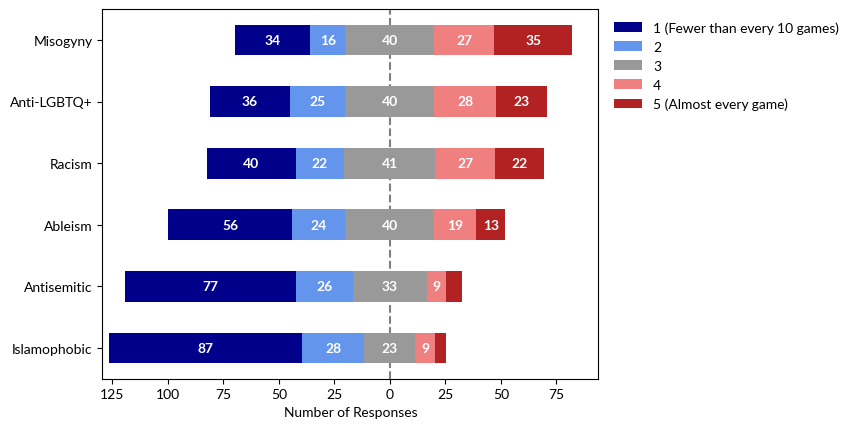

In [24]:
import plot_likert
import matplotlib.pyplot as plt

font = {'family': ['Lato']}
plt.rc('font', **font)
scale = sorted(discrimination_responses['Misogyny'].unique())
plot = plot_likert.plot_likert(discrimination_responses, scale, colors=reversed_likert5, bar_labels=True, bar_labels_color='white')
plot.legend(loc='upper right', bbox_to_anchor=(1.51, 1), frameon=False)
plot